In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score

import numpy as np

In [2]:
df = pd.read_csv('clusters_main.txt', sep=' ')
df

,8000,2
0,68.601997,102.491997
1,454.665985,264.808990
2,101.283997,169.285995
3,372.614990,263.140991
4,300.989014,46.555000
...,...,...
7995,442.420990,303.721985
7996,495.451996,288.502991
7997,267.605011,141.725006
7998,238.358002,252.729996


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

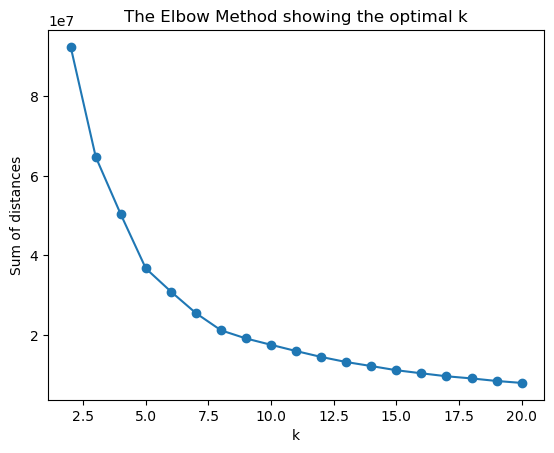

In [20]:
from sklearn.cluster import KMeans

K = range(2, 21)
models = [KMeans(n_clusters=k, random_state=42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [21]:
from sklearn.cluster import KMeans

X = df[['8000', '2']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
df['cluster_labels'] = kmeans.labels_

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


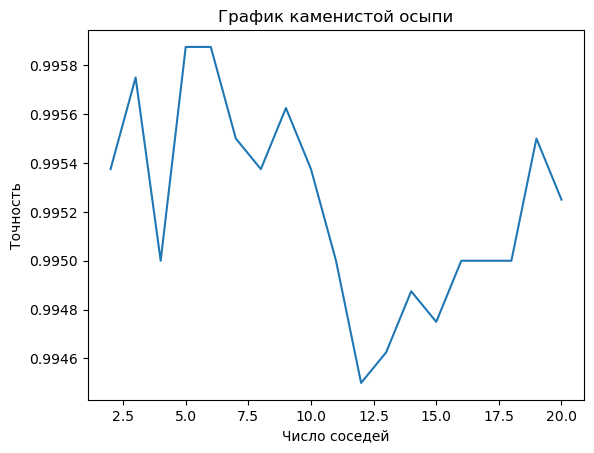

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

y = df['cluster_labels']
neighbors = list(range(2, 21))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


plt.plot(range(2, 21), cv_scores)
plt.title('График каменистой осыпи')
plt.xlabel('Число соседей')
plt.ylabel('Точность')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_classifier_optimal = KNeighborsClassifier(n_neighbors=5)
knn_classifier_optimal.fit(X_train, y_train)
y_pred_optimal = knn_classifier_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
accuracy_optimal

0.9970833333333333

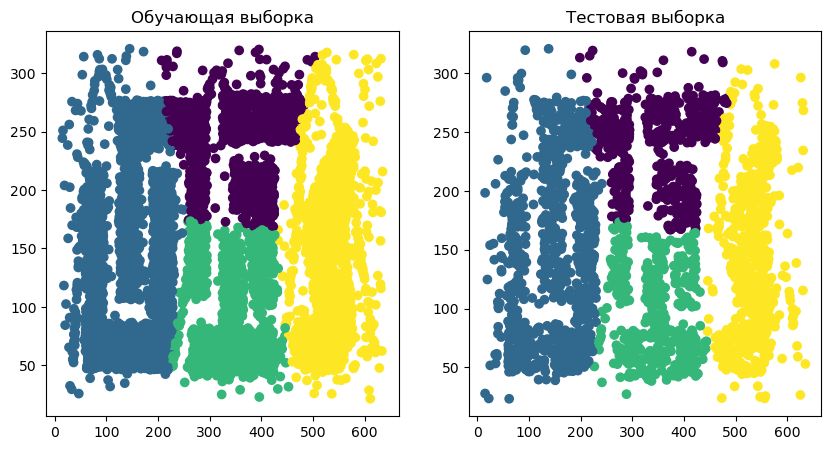

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))  


ax[0].scatter(X_train['8000'], X_train['2'], c=y_train)
ax[0].set_title('Обучающая выборка')

ax[1].scatter(X_test['8000'], X_test['2'], c=y_pred_optimal)
ax[1].set_title('Тестовая выборка')

plt.show()

In [16]:
optimal_k = neighbors[cv_scores.index(max(cv_scores))]
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)


pred = knn_optimal.predict(X_test)


print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       529
           1       0.99      1.00      1.00       567
           2       0.99      0.98      0.99       386
           3       0.99      1.00      0.99       480
           4       0.99      0.98      0.99       438

    accuracy                           0.99      2400
   macro avg       0.99      0.99      0.99      2400
weighted avg       0.99      0.99      0.99      2400



In [17]:
print(mean_squared_error(y_test, pred))

0.04083333333333333
